In [1]:
import numpy as np
import pandas as pd
import PySAM.Pvsamv1 as pv

import matplotlib.pyplot as plt

In [30]:
pvmodel = pv.default('PVBatteryResidential')

In [3]:
# there are formatting differences between the weather file that we download from
# pvwatts and what SAM wants --- SAM wants the file from the NSRDB 
pvmodel.SolarResource.solar_resource_file = "../data/tmy_5.579_-0.233_2005_2014.epw"

In [4]:
pvmodel.Inverter.export()

{'inv_cec_cg_eff_cec': 96.6364,
 'inv_cec_cg_paco': 3800.0,
 'inv_ds_eff': 96.0,
 'inv_ds_paco': 4000.0,
 'inv_num_mppt': 1.0,
 'inv_pd_eff': 95.0,
 'inv_pd_paco': 4000.0,
 'inv_snl_eff_cec': 97.0531,
 'inv_snl_paco': 3850.0,
 'inverter_count': 1.0,
 'inverter_model': 0.0,
 'mppt_hi_inverter': 480.0,
 'mppt_low_inverter': 100.0}

In [5]:
our_load_profile = np.loadtxt("../data/Max_load_profile_for_year.txt", skiprows=1)

In [6]:
pvmodel.Load.load = tuple(our_load_profile)

In [7]:
pvmodel.execute()

In [31]:
pvmodel.SystemDesign.subarray1_modules_per_string

7.0

<BarContainer object of 12 artists>

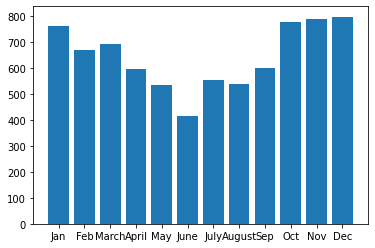

In [8]:
months = ["Jan", "Feb", "March", "April", "May", "June", "July", "August", "Sep", "Oct", "Nov", "Dec"]
plt.bar(months, pvmodel.Outputs.monthly_energy)

In [9]:
pvmodel.Outputs.annual_energy

7727.689373191183

In [10]:
pvmodel.Outputs.monthly_energy # System AC energy
pvmodel.Load.load  # electricity load

(0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 9.671,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,
 0.726,


In [20]:
pvmodel.Outputs.monthly_pv_to_batt
pvmodel.Outputs.monthly_pv_to_load
# pvmodel.Outputs.monthly_pv_to_grid

(750.711656171897,
 662.9025297515311,
 689.0340199777896,
 594.0414600117102,
 534.4611413648552,
 415.3544522925302,
 554.3418794810761,
 537.2526129661588,
 594.1591143248256,
 760.971941522531,
 777.7707962925422,
 789.9051667848086)

In [12]:
dates = pd.date_range(start="1/1/2006", end="1/1/2007", freq="H").delete(-1)

In [13]:
hourly_load_w_dates = pd.DataFrame({"Load" : pvmodel.Load.load, "Dates" : dates})

In [14]:
hourly_load_w_dates.groupby(hourly_load_w_dates["Dates"].dt.month)["Load"].sum()

Dates
1     3867.684
2     3493.392
3     3867.684
4     3742.920
5     3867.684
6     3742.920
7     3867.684
8     3867.684
9     3742.920
10    3867.684
11    3742.920
12    3867.684
Name: Load, dtype: float64

In [21]:
monthly_load = hourly_load_w_dates.groupby(hourly_load_w_dates["Dates"].dt.strftime('%B'))["Load"].sum()

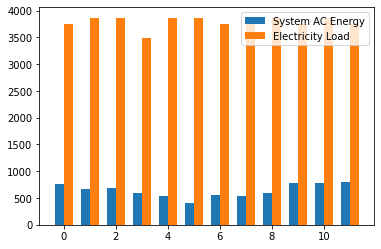

In [24]:
months = ["Jan", "Feb", "March", "April", "May", "June", "July", "August", "Sep", "Oct", "Nov", "Dec"]

x = np.arange(len(months))  # the label locations
width = 0.35  # the width of the bars

f, ax = plt.subplots()
ax.bar(x - width/2, pvmodel.Outputs.monthly_energy, width, label="System AC Energy")
ax.bar(x + width/2, monthly_load.values, width, label="Electricity Load")
plt.legend();